In [2]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing

In [3]:
data=pd.read_csv("mammographic_masses.data",names=["bi-rads","age","shape","margin","density","severity"])
data_n=data.values #extracting only the matrix of values 

data = data[(data['bi-rads']!='?') & (data['age']!='?') & (data['shape']!='?') & (data['margin']!='?') & (data['density']!='?') & (data['severity']!='?')]
data = data.astype(int)
print(data.shape)

X = data[["bi-rads","age","shape","margin","density"]]
y=data[["severity"]].values
X

##a few examples from the dataset 

(830, 6)


,bi-rads,age,shape,margin,density
0,5,67,3,5,3
2,5,58,4,5,3
3,4,28,1,1,3
8,5,57,1,5,3
10,5,76,1,4,3
...,...,...,...,...,...
949,4,47,2,1,3
950,4,56,4,5,3
951,4,64,4,5,3
952,5,66,4,5,3


In [4]:
one_hot_shapes = pd.get_dummies(X['shape'])
one_hot_shapes

,1,2,3,4
0,0,0,1,0
2,0,0,0,1
3,1,0,0,0
8,1,0,0,0
10,1,0,0,0
...,...,...,...,...
949,0,1,0,0
950,0,0,0,1
951,0,0,0,1
952,0,0,0,1


In [5]:
X_one_hot = X.join(one_hot_shapes)

In [6]:
X_one_hot.drop('shape', axis=1, inplace=True)
X_one_hot


,bi-rads,age,margin,density,1,2,3,4
0,5,67,5,3,0,0,1,0
2,5,58,5,3,0,0,0,1
3,4,28,1,3,1,0,0,0
8,5,57,5,3,1,0,0,0
10,5,76,4,3,1,0,0,0
...,...,...,...,...,...,...,...,...
949,4,47,1,3,0,1,0,0
950,4,56,5,3,0,0,0,1
951,4,64,5,3,0,0,0,1
952,5,66,5,3,0,0,0,1


In [7]:
X_one_hot.rename(columns={1: 'round', 2: 'oval',
                 3: 'lobular', 4: 'irregular'}, inplace=True)
X_one_hot


,bi-rads,age,margin,density,round,oval,lobular,irregular
0,5,67,5,3,0,0,1,0
2,5,58,5,3,0,0,0,1
3,4,28,1,3,1,0,0,0
8,5,57,5,3,1,0,0,0
10,5,76,4,3,1,0,0,0
...,...,...,...,...,...,...,...,...
949,4,47,1,3,0,1,0,0
950,4,56,5,3,0,0,0,1
951,4,64,5,3,0,0,0,1
952,5,66,5,3,0,0,0,1


In [8]:
one_hot_margin = pd.get_dummies(X['margin'])
one_hot_margin


,1,2,3,4,5
0,0,0,0,0,1
2,0,0,0,0,1
3,1,0,0,0,0
8,0,0,0,0,1
10,0,0,0,1,0
...,...,...,...,...,...
949,1,0,0,0,0
950,0,0,0,0,1
951,0,0,0,0,1
952,0,0,0,0,1


In [9]:
X_one_hot = X_one_hot.join(one_hot_margin)


In [10]:
X_one_hot.drop('margin', axis=1, inplace=True)
X_one_hot


,bi-rads,age,density,round,oval,lobular,irregular,1,2,3,4,5
0,5,67,3,0,0,1,0,0,0,0,0,1
2,5,58,3,0,0,0,1,0,0,0,0,1
3,4,28,3,1,0,0,0,1,0,0,0,0
8,5,57,3,1,0,0,0,0,0,0,0,1
10,5,76,3,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
949,4,47,3,0,1,0,0,1,0,0,0,0
950,4,56,3,0,0,0,1,0,0,0,0,1
951,4,64,3,0,0,0,1,0,0,0,0,1
952,5,66,3,0,0,0,1,0,0,0,0,1


In [11]:
X_one_hot.rename(columns={1: 'circumscribed', 2: 'microlobulated',
                 3: 'obscured', 4: 'ill-defined', 5: 'spiculated'}, inplace=True)
X_one_hot


,bi-rads,age,density,round,oval,lobular,irregular,circumscribed,microlobulated,obscured,ill-defined,spiculated
0,5,67,3,0,0,1,0,0,0,0,0,1
2,5,58,3,0,0,0,1,0,0,0,0,1
3,4,28,3,1,0,0,0,1,0,0,0,0
8,5,57,3,1,0,0,0,0,0,0,0,1
10,5,76,3,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
949,4,47,3,0,1,0,0,1,0,0,0,0
950,4,56,3,0,0,0,1,0,0,0,0,1
951,4,64,3,0,0,0,1,0,0,0,0,1
952,5,66,3,0,0,0,1,0,0,0,0,1


In [13]:
SeverityBR= pd.DataFrame({"bi-rads":data["bi-rads"], "severity":data["severity"]})

BiRads=[1,2,3,4,5]

for n in BiRads:
    SBRnumber=SeverityBR[SeverityBR["bi-rads"]== n]
    l=len(SBRnumber)
    Positive=len(SBRnumber[SBRnumber["severity"] == 1])
    Negative=len(SBRnumber[SBRnumber["severity"] == 0])
    if l== 0:
        print(0.0, f'% of the cases marked with Bi-Rads = {n} are positive')
    else:
        print(round(((Positive/l)*100),2), f'% of the cases marked with Bi-Rads = {n} are positive')

0.0 % of the cases marked with Bi-Rads = 1 are positive
0.0 % of the cases marked with Bi-Rads = 2 are positive
16.67 % of the cases marked with Bi-Rads = 3 are positive
22.01 % of the cases marked with Bi-Rads = 4 are positive
90.22 % of the cases marked with Bi-Rads = 5 are positive


In [14]:
#sns.pairplot(data,diag_kind="kde",hue="severity")

In [14]:
poly = sklearn.preprocessing.PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [16]:
#X = sklearn.preprocessing.normalize(X)
#X

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn import metrics


c = [0.0001, 0.001, 0.01, 0.1, 1, 10]
l1 = np.arange(0.2, 0.9, 0.1)

param_grid = {
    'C': c,
    'solver': ['saga'],
    'penalty': ['elasticnet'],
    'l1_ratio': l1
}

param_grid_2 = {
    'C': c,
    'penalty': ['none', 'l2'],
}

param_grid_3 = {
    'C': c,
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2'],
}

i = 1
inner_cv = KFold(n_splits=5, shuffle=True, random_state=i)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=i)

X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.3, random_state=42)


In [105]:
clf_1 = GridSearchCV(estimator=LogisticRegression(max_iter=5000), param_grid=param_grid, cv=inner_cv, scoring='recall')
#nested_score_1 = cross_val_score(clf_1, X=X, y=y.ravel(), cv=outer_cv)
#nested_score_1.mean()
clf_1.fit(X_train, y_train.ravel())
y_pred_1 = clf_1.predict(X_test)

/Users/luismiguel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/luismiguel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/luismiguel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/luismiguel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/luismiguel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/luismiguel/opt/ana

In [106]:
clf_2 = GridSearchCV(estimator=LogisticRegression(
    max_iter=5000), param_grid=param_grid_2, cv=inner_cv, scoring='recall')
#nested_score_2 = cross_val_score(clf_2, X=X, y=y.ravel(), cv=outer_cv)
#nested_score_2.mean()
clf_2.fit(X_train, y_train.ravel())
y_pred_2 = clf_2.predict(X_test)

/Users/luismiguel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/luismiguel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/luismiguel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/luismiguel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/luismiguel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/luismiguel/opt/ana

In [107]:
clf_3 = GridSearchCV(estimator=LogisticRegression(),
                     param_grid=param_grid_3, cv=inner_cv, scoring='recall')
#nested_score_3 = cross_val_score(clf_3, X=X, y=y.ravel(), cv=outer_cv)
#nested_score_3.mean()
clf_3.fit(X_train, y_train.ravel())
y_pred_3 = clf_3.predict(X_test)

In [78]:
print("##### Clf_1 #####")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_1))
print("Recall: ", metrics.recall_score(y_test, y_pred_1))
print("Precision: ", metrics.precision_score(y_test, y_pred_1))
print("F1: ", metrics.f1_score(y_test, y_pred_1))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred_1))

##### Clf_1 #####
Accuracy:  0.8514056224899599
Recall:  0.8852459016393442
F1:  0.8537549407114624
0.8244274809160306
Confusion Matrix: 
 [[104  23]
 [ 14 108]]


In [77]:
print("##### Clf_2 #####")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_2))
print("Recall: ", metrics.recall_score(y_test, y_pred_2))
print("Precision: ", metrics.precision_score(y_test, y_pred_2))
print("F1: ", metrics.f1_score(y_test, y_pred_2))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred_2))


##### Clf_2 #####
Accuracy:  0.8554216867469879
Recall:  0.8688524590163934
F1:  0.8548387096774194
0.8412698412698413
Confusion Matrix: 
 [[107  20]
 [ 16 106]]


In [76]:
print("##### Clf_3 #####")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_3))
print("Recall: ", metrics.recall_score(y_test, y_pred_3))
print("Precision: ", metrics.precision_score(y_test, y_pred_3))
print("F1: ", metrics.f1_score(y_test, y_pred_3))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred_3))

##### Clf_3 #####
Accuracy:  0.8554216867469879
Recall:  0.8688524590163934
F1:  0.8548387096774194
Confusion Matrix: 
 [[107  20]
 [ 16 106]]


In [115]:
print("Best parameters set found on development set 1:")
print(clf_1.best_params_) 
print(clf_1.best_score_)

print("\nBest parameters set found on development set 2:")
print(clf_2.best_params_)
print(clf_2.best_score_)

print("\nBest parameters set found on development set 3:")
print(clf_3.best_params_)
print(clf_3.best_score_)

Best parameters set found on development set 1:
{'C': 0.0001, 'l1_ratio': 0.6000000000000001, 'penalty': 'elasticnet', 'solver': 'saga'}
1.0

Best parameters set found on development set 2:
{'C': 0.1, 'penalty': 'l2'}
0.7998091493100568

Best parameters set found on development set 3:
{'C': 0.0001, 'penalty': 'l1', 'solver': 'liblinear'}
1.0


In [186]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.3, random_state=42)
clf = LogisticRegression(C=0.1, penalty='elasticnet', solver='saga', l1_ratio=0.4)
clf.fit(X_train, y_train.ravel())
y_pred = clf.predict(X_test)

print("##### Clf Final#####")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("F1: ", metrics.f1_score(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))


##### Clf Final#####
Accuracy:  0.8433734939759037
Recall:  0.9180327868852459
Precision:  0.7943262411347518
F1:  0.8517110266159698
Confusion Matrix: 
 [[ 98  29]
 [ 10 112]]


/Users/luismiguel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = LogisticRegression(C=0.1, penalty='elasticnet', solver='saga', l1_ratio=0.7)
clf.fit(X_train, y_train.ravel())
y_pred = clf.predict(X_test)

print("##### Clf Original #####")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("F1: ", metrics.f1_score(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))


##### Clf Original #####
Accuracy:  0.8032128514056225
Recall:  0.9016393442622951
Precision:  0.7482993197278912
F1:  0.8178438661710038
Confusion Matrix: 
 [[ 90  37]
 [ 12 110]]


/Users/luismiguel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

clf = LogisticRegression(C=0.1, penalty='l2')
clf.fit(X_train, y_train.ravel())
y_pred = clf.predict(X_test)

print("##### Clf Poly #####")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("F1: ", metrics.f1_score(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))


##### Clf Poly #####
Accuracy:  0.8514056224899599
Recall:  0.8442622950819673
Precision:  0.8512396694214877
F1:  0.8477366255144033
Confusion Matrix: 
 [[109  18]
 [ 19 103]]


/Users/luismiguel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [155]:
clf_final = LogisticRegression(C=0.1, penalty='elasticnet', solver='saga', l1_ratio=0.4)
clf.fit(X_one_hot, y)

/Users/luismiguel/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismiguel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.1, l1_ratio=0.4, penalty='elasticnet', solver='saga')

In [175]:
a = [5, 70, 4, 1, 0, 0, 0, 0, 0, 0,	0,	1]
y_1 = np.array(a)
y_1 = y_1.reshape(1,12)

clf.predict(y_1)

(12,)
(1, 12)


/Users/luismiguel/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

/Users/luismiguel/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


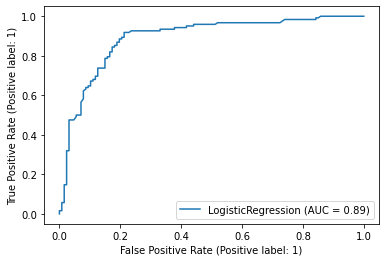

In [124]:
from sklearn import metrics
metrics.plot_roc_curve(clf, X_test, y_test)
#metrics.plot_roc_curve(clf_2, X_test, y_test)
#metrics.plot_roc_curve(clf_3, X_test, y_test)
plt.show()


In [ ]:
'''pos=(y==1)
neg=(y==0)

# Calculate the intercept and gradient of the decision boundary.
# este é o gradiente apenas para 2 colunas, se se quiser estudar outras mudar os números do w (os dois a dividir são iguais)
c = -b / w3
m = -w2 / w3  

# Plot the data and the classification with the decision boundary.
# Se se mudar as colunas mudar os números aqui também
xmin, xmax = min(X[:,2]) - 0.1, max(X[:,2]) +0.1
ymin, ymax = min(X[:,3]) - 0.1, max(X[:,3]) +0.1
xd = np.array([xmin, xmax])
yd = m * xd + c
plt.plot(xd, yd, 'k', lw = 1, ls = '--')
plt.fill_between(xd, yd, ymin, color = 'tab:blue', alpha = 0.2)
plt.fill_between(xd, yd, ymax, color = 'tab:orange', alpha = 0.2)

# mudar os numeros aqui também se se for ver outras colunas
plt.scatter(X[pos][:,2],X[pos][:,3], alpha = 0.5, c="r",marker="+")
plt.scatter(X[neg][:,2],X[neg][:,3], alpha = 0.2, c="b",marker="o")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.show()'''

"pos=(y==1)\nneg=(y==0)\n\n# Fit the data to a logistic regression model.\nclf = sklearn.linear_model.LogisticRegression()\nclf.fit(X, y)\n\n# Retrieve the model parameters.\nb = clf.intercept_[0]\nw1, w2, w3, w4, w5 = clf.coef_.T\n# Calculate the intercept and gradient of the decision boundary.\nc = -b / w4\nm = -w2 / w4  # este é o gradiente apenas para a coluna 0 e 1\n\n# Plot the data and the classification with the decision boundary.\nxmin, xmax = -1, 1\nymin, ymax = -1, 1\nxd = np.array([xmin, xmax])\nyd = m * xd + c\nplt.plot(xd, yd, 'k', lw = 1, ls = '--')\nplt.fill_between(xd, yd, ymin, color = 'tab:blue', alpha = 0.2)\nplt.fill_between(xd, yd, ymax, color = 'tab:orange', alpha = 0.2)\n\nplt.scatter(X[pos][:,0],X[pos][:,1], s = 8, alpha = 0.5)\nplt.scatter(X[neg][:,0],X[neg][:,1], s = 8, alpha = 0.5)\nplt.xlim(xmin, xmax)\nplt.ylim(ymin, ymax)\n\nplt.show()"

In [ ]:
'''xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)'''

'xx, yy = np.mgrid[-5:5:.01, -5:5:.01]\ngrid = np.c_[xx.ravel(), yy.ravel()]\nprobs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)'

In [ ]:
'''u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] = p'''

'u_vals = np.linspace(-1,1.5,50)\nv_vals= np.linspace(-1,1.5,50)\nz=np.zeros((len(u_vals),len(v_vals)))\nfor i in range(len(u_vals)):\n    for j in range(len(v_vals)):\n        z[i,j] = p'

In [ ]:
'''sns.set(style="white")

def map_features(x, degree):
    x_old = x.copy()
    x = pd.DataFrame({"intercept" : [1]*x.shape[0]})
    column_index = 1
    for i in range(1, degree+1):
        for j in range(0, i+1):
            x.insert(column_index, str(x_old.columns[1]) + "^" + str(i-j) + str(x_old.columns[2]) + "^" + str(j), np.multiply(x_old.iloc[:,1]**(i-j), x_old.iloc[:,2]**(j)))
            column_index+=1
    return x

def normalize_features(x):
    global mean_values
    global std_values
    for column_name in x.columns[1:]:
        mean = x[column_name].mean()
        std = x[column_name].std()
        x[column_name] = (x[column_name] - mean) / std
        mean_values[column_name] = mean
        std_values[column_name] = std
    return x

def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost(x, y, theta):
    m = x.shape[0]
    h_theta = pd.DataFrame(sigmoid(np.dot(x,theta)))
    cost = 1/m * ((-np.multiply(y,h_theta.apply(np.log)) - np.multiply(1-y, (1-h_theta).apply(np.log))).sum())
    return np.asscalar(cost)

def gradient_descent(x, y, theta):
    global cost_values
    m = x.shape[0]
    iterations = 1000
    alpha = 0.03
    cost_values = pd.DataFrame({'iteration' : [0], 'cost' : [cost(x,y,theta)]})

    for iteration in range(0,iterations):
        theta_old = theta.copy()
        theta.iloc[0,0] = theta.iloc[0,0] - (alpha/m) * np.asscalar((sigmoid(np.dot(x,theta_old)) - y).sum())
        for i in range(1,theta.shape[0]):
            theta.iloc[i,0] = theta.iloc[i,0] - (alpha/m) * np.asscalar(np.multiply((sigmoid(np.dot(x,theta_old)) - y), pd.DataFrame(x.iloc[:,i])).sum())
        c = cost(x,y,theta)
        cost_values = cost_values.append({"iteration" : iteration, "cost" : c}, ignore_index=True)

def predict(x):
    global theta
    probability = np.asscalar(sigmoid(np.dot(x.T,theta)))
    return probability
    if(probability >= 0.5):
        return 1
    else:
        return 0

### Read train data

### Create input data
#x = train_data.loc[:,"exam1":"exam2"]
x = X
### Add intercept column
x.insert(0, "intercept", 1)
mean_values = {}
std_values = {}
mapping_degree = 2
x = normalize_features(x) #normalize features
x = map_features(x, mapping_degree) #map polynomial features
#y = pd.DataFrame(train_data.loc[:,"admit"])
theta = pd.DataFrame({"theta" : [0] * len(x.columns)})

### Test cost of initial theta
# print(cost(x,y,theta))

### Perform Gradient Descent
gradient_descent(x, y, theta)
# print(theta)
# print("Cost: " + str(cost(x,y,theta)))

### Plot iteration vs Cost
plt.scatter(cost_values["iteration"], cost_values["cost"])
plt.show()

### Predict an example
#student = pd.DataFrame({"exam1": [52], "exam2":[63]})
#student.insert(0, "intercept", 1)
#normalizing
#for column_name in student.columns[1:]:
#    student[column_name] = (student[column_name] - mean_values[column_name]) / std_values[column_name]
#student = map_features(student, mapping_degree)
#print("probability of admission: " + str(predict(student.T)))

### Calculate Accuracy
acc = 0
for i in range(0,x.shape[0]):
    p = predict(pd.DataFrame(x.iloc[i,:]))
    actual = y.iloc[i,0]
    if(p >= 0.5):
        p = 1
    else:
        p = 0
    if(p == actual):
        acc+=1
print("Accuracy : " + str((acc/x.shape[0]) * 100))

### Plot decision boundary
x_min = data["exam1"].min()
x_max = data["exam1"].max()
y_min = data["exam2"].min()
y_max = data["exam2"].max()
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))
xx = pd.DataFrame(x_grid.ravel(), columns=["exam1"])
yy = pd.DataFrame(y_grid.ravel(), columns=["exam2"])
z = pd.DataFrame({"intercept" : [1]*xx.shape[0]})
z["exam1"] = xx
z["exam2"] = yy
z = normalize_features(z)
z = map_features(z,mapping_degree)
p = z.apply(lambda row: predict(pd.DataFrame(row)), axis=1)
p = np.array(p.values)
p = p.reshape(x_grid.shape)
plt.scatter(train_data[train_data["admit"] == 0]["exam1"], train_data[train_data["admit"] == 0]["exam2"],marker="o")
plt.scatter(train_data[train_data["admit"] == 1]["exam1"], train_data[train_data["admit"] == 1]["exam2"],marker="x")
plt.contour(x_grid, y_grid, p, levels = [0.5]) #displays only decision boundary
# plt.contour(x_grid, y_grid, p, 50, cmap="RdBu") #display a colored contour
'''

'sns.set(style="white")\n\ndef map_features(x, degree):\n    x_old = x.copy()\n    x = pd.DataFrame({"intercept" : [1]*x.shape[0]})\n    column_index = 1\n    for i in range(1, degree+1):\n        for j in range(0, i+1):\n            x.insert(column_index, str(x_old.columns[1]) + "^" + str(i-j) + str(x_old.columns[2]) + "^" + str(j), np.multiply(x_old.iloc[:,1]**(i-j), x_old.iloc[:,2]**(j)))\n            column_index+=1\n    return x\n\ndef normalize_features(x):\n    global mean_values\n    global std_values\n    for column_name in x.columns[1:]:\n        mean = x[column_name].mean()\n        std = x[column_name].std()\n        x[column_name] = (x[column_name] - mean) / std\n        mean_values[column_name] = mean\n        std_values[column_name] = std\n    return x\n\ndef sigmoid(z):\n    return 1/(1+np.exp(-z))\n\ndef cost(x, y, theta):\n    m = x.shape[0]\n    h_theta = pd.DataFrame(sigmoid(np.dot(x,theta)))\n    cost = 1/m * ((-np.multiply(y,h_theta.apply(np.log)) - np.multiply(1-